In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv('co2_data.csv')
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df["ds"], format='%Y-%m-%d %H:%M:%S')
df['y'] = pd.to_numeric(df.y.str.replace('ppm', ''), downcast='float')
df.set_index('ds')

,y
ds,
2021-08-18 13:36:01,469.109985
2021-08-18 13:36:07,468.869995
2021-08-18 13:40:18,478.920013
2021-08-18 13:40:22,478.950012
2021-08-18 15:38:14,456.260010
...,...
2021-08-23 17:20:12,599.559998
2021-08-23 17:20:23,598.799988
2021-08-23 17:20:33,596.219971


<AxesSubplot:>

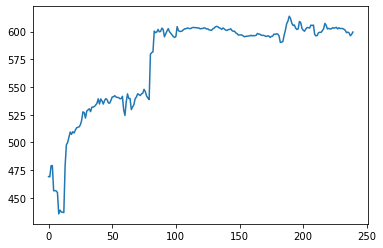

In [3]:
values = df['y']
values.plot()

In [5]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Initial log joint probability = -2.42029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       865.551     0.0105034       563.017      0.5024      0.5024      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       881.047    0.00151833       104.262      0.3712           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       883.509   0.000105635       183.332   2.451e-07       0.001      326  LS failed, Hessian reset 
     270       887.043    8.3347e-05       134.136   5.679e-07       0.001      433  LS failed, Hessian reset 
     299       887.507   0.000196992       88.5886      0.3007           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     359       887.671   4.02042e-08       78.7555      0.3707           1      548   
Optimization terminat

In [8]:
future = model.make_future_dataframe(periods=1 * 1)
forecast = model.predict(future)

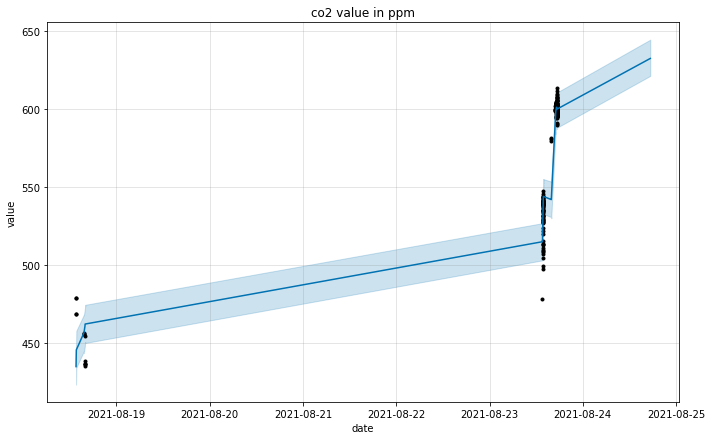

In [9]:
fig = model.plot(forecast, xlabel='date', ylabel='value')
plt.title('co2 value in ppm')
plt.show()